<a href="https://colab.research.google.com/github/gabrielmprata/MVP_02_ML/blob/main/MVP_SP02_ML_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

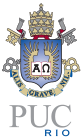 <font size="4"> **MVP de Machine Learning e Deep Learning**

---
>
**Pós-Graduação em Ciência de Dados e Analytics**
>
**Sprint 02**
>
**Aluno**: Gabriel Prata
>
**Data**: 05/06/2023
>
---

#**<font color=#FE8202> 1. Definição do problema**

A malha rodoviária é a principal forma de locomoção do país no que tange o deslocamento de pessoas, produtos, matérias primas, alimentos e combustível a curtas e longas distâncias.
>
Este trabalho visa mostrar através dos dados abertos disponibilizados pela Polícia Rodoviária Federal, dentre os 70.000 Km de rodovias onde atua, o impacto dos acidentes de trânsito e sua letalidade nas rodovias federais, tendo como período analisado o ano de 2020.
>
O Brasil é o terceiro país com mais mortes no trânsito, ficando atrás apenas da Índia e da China segundo o relatório Global Status Report on Road Safety da Organização Mundial de Saúde (OMS).
>
Cerca de 82% dos acidentes de trânsito nas rodovias federais brasileiras, são com vítimas, tendo em vista esse grande percentual de vítimas, nesse estudo, queremos entender os fatores que contribuem para os acidentes acontecerem.
>
Esse estudo tem como objetivo geral analisar o estado físico dos envolvidos, classificando o acidente de trânsito em "com vítimas" ou "sem vítimas", fazendo uso de **algoritmos de aprendizado de máquina supervisionado**.
>
O dataset conta com 30 atributos relacionados à caracterização do acidente, 4 atributos que classifica o estado das vítimas em, ilesos, feridos leve, feridos grave e mortos, e 1 variável que classifica o acidente em, sem vítimas, com vítimas feridas e com vitimas fatais. Essa ultima variável utilizaremos como alvo e as demais, serão analisadas para definir quais serão selecionadas como preditoras.
>
Para mais informações sobre o dataset, consulte: https://www.gov.br/prf/pt-br/acesso-a-informacao/dados-abertos/dicionario-de-dados


>**<font color=#FE8202> Dicionário de dados**

1.   **id**    -  Variável com valores numéricos, representando o identificador do acidente
2. **data_inversa** - Data da ocorrência no formato dd/mm/aaaa.
3. **dia_semana** - Dia da semana da ocorrência. Ex.: Segunda, terça, etc.
4. **horario** - Horário da ocorrência no formato hh:mm:ss.
5. **uf** - Unidade da Federação. Ex.: MG, SP, etc.
6. **br** - Variável com valores numéricos, representando o identificador da BR.
7. **km** - Identificação do quilômetro onde ocorreu o acidente, com valor mínimo de 0,1 km e com a casa decimal separada por ponto.
8. **municipio** - Nome do município de ocorrência do acidente.
9. **causa_acidente** - Identificação da causa principal do acidente.
10. **tipo_acidente** - Identificação do tipo de acidente. Ex.: Colisão frontal, etc.
11. **classificação_acidente** - Classificação quanto à gravidade do acidente.
12. **fase_dia** - Fase do dia no momento do acidente. Ex.: Amanhecer, Pleno dia, etc.
13. **sentido_via** - Sentido da via considerando o ponto de colisão: Crescente e decrescente.
14. **Condição_meteorologica** - Condição meteorologica no momento do acidente. Ex.: Céu claro, chuva, etc.
15. **tipo_pista** - Tipo da pista considerando a quantidade de faixas: Dupla. simples ou múltipla.
16. **tracado_via** - Descrição do traçãdo da via.
17. **usu_solo** - Descrição sobre as características do local do acidente: Urbano=Sim;Rural=Não.
18. **pessoas** - Total de pessoas envolvidas no acidente.
19. **mortos** - Quantidade mortos no acidente.
20. **feridos_leves** - Quantidade de feridos leves no acidente.
21. **feridos_graves** - Quantidade de graves leves no acidente.
22. **ilesos** - Quantidade de ilesos no acidente.
23. **ignorados** - Quantidade de ignorados no acidente.(Quando não se sabe o estado da vítima)
24. **feridos** - Quantidade total de feridos no acidente.
25. **veiculos** - Quantidade de veículos envolvidos no acidente.
26. **latitude** - Latitude do local do acidente em formato geodésico decimal.
27. **longitude** - Longitude do local do acidente em formato geodésico decimal.
28. **regional** - Não definido no dicionário de dados fornecido pela PRF.
29. **delegacia** - Não definido no dicionário de dados fornecido pela PRF.
30. **uop** - Não definido no dicionário de dados fornecido pela PRF.

#**<font color=#FE8202> 2. Carga de Dados**

Nesse tópico iremos importar o dataset que está armazenado no GitHub, separado por ano, no formato CSV, com cabeçalho e separado por ponto e vírgula(;).
>
Iremos utilizar o pacote Pandas, para carregar esse arquivo, através de uma URL, e armazenaremos os dados em um **dataframe**(matrizes multidimensionais similares a uma tabela de dados relacionais, com linhas e colunas rotuladas).
>
Para isso, utilizaremos o método read_csv()

In [51]:
# Importando todas as bibliotecas que iremos utilizar no projeto
# Importação de pacotes
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings

#bibliotecas para visualização de dados
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import matplotlib.gridspec as gridspec #geometria da grade e alocar subplot
import folium #mapas
import branca.colormap as cm
import plotly.graph_objects as go

# Transformações Categóricas
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

# Feature Selection
from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos
from sklearn.feature_selection import mutual_info_classif

# Separar treino e teste
from sklearn.model_selection import train_test_split

# Pipeline
from sklearn.pipeline import Pipeline

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Validação cruzada
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#from datetime import datetime, date, time
import time
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

import json
import requests

###**<font color=#FE8202> 2.1. Dataset Acidentes**

In [52]:
# importando dados de uma url para um dataframe

# URL de importação
url  = "https://raw.githubusercontent.com/gabrielmprata/MVP_02_ML/main/datatran2020.csv"
url2 = "https://raw.githubusercontent.com/gabrielmprata/MVP_02_ML/main/datatran2021.csv"
url3 = "https://raw.githubusercontent.com/gabrielmprata/MVP_02_ML/main/datatran2022.csv"

# Carga do dataset para o Pandas dataframe
acidentes_2020 = pd.read_csv(url, encoding="Latin 1", sep=';')
acidentes_2021 = pd.read_csv(url2, encoding="Latin 1", sep=';')
acidentes_2022 = pd.read_csv(url3, encoding="Latin 1", sep=';')


In [53]:
# Concatenar os dataframes de 2019 e 2020 em um único dataframe.
# Utilizaremos o método "concat"

acidentes = pd.concat([acidentes_2020, acidentes_2021, acidentes_2022 ], sort=False, ignore_index=True)

# Apagando os dataframes que não iremos mais utilizar
del acidentes_2020
del acidentes_2021
del acidentes_2022

#**<font color=#FE8202> 3. Análise de Dados Inicial**

Nessa etapa iremos fazer a análise exploratória **inicial** de dados.
>
Uma etapa bem crítica, pois nesse primeiro momento, devemos compreender bem os dados.
>
Depois de entender melhor esses dados, na próxima etapa, seremos capazes de limpar, transformar e apresentar melhor os dados, assim como obter os melhores resultados possíveis nos algoritmos de Machine Learning.

###**<font color=#FE8202> 3.1. Estatísticas Descritivas**

Compreende a organização, o resumo e, descrever os dados, que podem ser expressos em tabelas e gráficos.
>
Veremos a seguir alguns comandos para exibir algumas estatísticas descritivas.
>
---



In [54]:
#	Quantidade de atributos e instâncias (linhas/colunas)
acidentes.shape

(192536, 30)

Um dataframe com 192.536 mil linhas e 30 colunas


---



In [55]:
# verificando os tipos de dados de cada coluna do dataframe
acidentes.dtypes

id                        float64
data_inversa               object
dia_semana                 object
horario                    object
uf                         object
br                        float64
km                         object
municipio                  object
causa_acidente             object
tipo_acidente              object
classificacao_acidente     object
fase_dia                   object
sentido_via                object
condicao_metereologica     object
tipo_pista                 object
tracado_via                object
uso_solo                   object
pessoas                     int64
mortos                      int64
feridos_leves               int64
feridos_graves              int64
ilesos                      int64
ignorados                   int64
feridos                     int64
veiculos                    int64
latitude                   object
longitude                  object
regional                   object
delegacia                  object
uop           



---



In [56]:
# Mostra diversas informações do Dataframe em um único comando
acidentes.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192536 entries, 0 to 192535
Data columns (total 30 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      192536 non-null  float64
 1   data_inversa            192536 non-null  object 
 2   dia_semana              192536 non-null  object 
 3   horario                 192536 non-null  object 
 4   uf                      192536 non-null  object 
 5   br                      192014 non-null  float64
 6   km                      192014 non-null  object 
 7   municipio               192536 non-null  object 
 8   causa_acidente          192536 non-null  object 
 9   tipo_acidente           192536 non-null  object 
 10  classificacao_acidente  192536 non-null  object 
 11  fase_dia                192536 non-null  object 
 12  sentido_via             192536 non-null  object 
 13  condicao_metereologica  192536 non-null  object 
 14  tipo_pista          


A função info() da biblioteca pandas, nos fornece um resumo do dataframe, sendo muito útil para ter uma visão geral do conjunto de dados.
>
Usando o parâmetro memory_usage = “deep”, saberemos exatamente quanto de memória o dataframe está utilizando.
>
Sendo assim, depois dos processos de transformações de dados saberemos se tivemos algum ganho de memoria no dataframe.


O dataframe está ocupando cerca de 275 Megas de espaço.


---



In [57]:
# Exibe as 5 primeiras linhas (Default do comando head)
acidentes.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,260031.0,2020-01-01,quarta-feira,01:00:00,TO,153.0,"678,1",GURUPI,Animais na Pista,Atropelamento de Animal,...,5,0,0,5,1,"-11,77460203","-49,10744996",SR-TO,UOP01/TO,NaN
1,260036.0,2020-01-01,quarta-feira,01:00:00,RJ,116.0,178,NOVA IGUACU,Falta de Atenção do Pedestre,Atropelamento de Pedestre,...,0,1,0,0,1,"-22,75223028","-43,4379103",SR-RJ,DEL5/1,UOP02/RJ
2,260037.0,2020-01-01,quarta-feira,01:52:00,SC,101.0,"206,9",SAO JOSE,Ingestão de Álcool,Colisão lateral,...,0,1,0,1,2,"-27,59193546","-48,61824557",SR-SC,DEL8/1,UOP01/SC
3,260038.0,2020-01-01,quarta-feira,01:15:00,RO,364.0,236,CACOAL,Velocidade Incompatível,Saída de leito carroçável,...,1,0,0,1,1,"-11,44624577","-61,43761218",SR-RO,DEL21/2,UOP02/RO
4,260039.0,2020-01-01,quarta-feira,01:30:00,PR,153.0,360,REBOUCAS,Ingestão de Álcool,Capotamento,...,4,0,0,6,1,"-25,67503796","-50,75089805",SR-PR,DEL7/3,UOP04/PR


In [58]:
# Exibe as 5 últimas linhas (Default do comando tail)
acidentes.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
192531,516543.0,2022-11-06,domingo,20:00:00,PI,316.0,313,PICOS,Ausência de reação do condutor,Colisão transversal,...,1,1,2,1,2,"-7,07959049","-41,44975182",SPRF-PI,DEL04-PI,UOP01-DEL04-PI
192532,516703.0,2022-05-03,terça-feira,02:30:00,ES,262.0,17,VIANA,Velocidade Incompatível,Saída de leito carroçável,...,0,0,1,0,1,"-20,38635961","-40,47272969",SPRF-ES,DEL01-ES,UOP01-DEL01-ES
192533,516707.0,2022-11-29,terça-feira,19:00:00,MG,146.0,459,BOTELHOS,Transitar na contramão,Colisão frontal,...,1,0,0,2,2,"-21,62224461","-46,40968323",SPRF-MG,DEL09-MG,UOP01-DEL09-MG
192534,516846.0,2022-07-31,domingo,09:54:00,CE,116.0,5,FORTALEZA,Manobra de mudança de faixa,Tombamento,...,0,0,1,1,2,"-3,79654632","-38,50665092",SPRF-CE,DEL01-CE,UOP02-DEL01-CE
192535,516931.0,2022-11-17,quinta-feira,18:13:00,PR,277.0,"11,8",PARANAGUA,Animais na Pista,Atropelamento de Animal,...,2,0,0,2,1,"-25,56418984","-48,63272406",SPRF-PR,DEL01-PR,UOP05-DEL01-PR


Com a exibição das linhas, é mais fácil perceber que o processo de importação, considerou alguns atributos como Float ao inves de integer.
>
Nesse momento não irá interferir na exploração inicial de dados, depois na etapa de pré-processamento iremos modificar.


---



In [59]:
# Quantidade de valores únicos
acidentes.nunique()

id                        192536
data_inversa                1096
dia_semana                     7
horario                     1432
uf                            27
br                           120
km                          9117
municipio                   1937
causa_acidente                86
tipo_acidente                 20
classificacao_acidente         3
fase_dia                       4
sentido_via                    3
condicao_metereologica        10
tipo_pista                     3
tracado_via                   10
uso_solo                       2
pessoas                       62
mortos                        13
feridos_leves                 41
feridos_graves                22
ilesos                        55
ignorados                     17
feridos                       47
veiculos                      16
latitude                   91515
longitude                  91507
regional                      54
delegacia                    342
uop                          523
dtype: int

In [60]:
# Quantidade de nulls no dataframe
acidentes.isnull().sum()

id                          0
data_inversa                0
dia_semana                  0
horario                     0
uf                          0
br                        522
km                        522
municipio                   0
causa_acidente              0
tipo_acidente               0
classificacao_acidente      0
fase_dia                    0
sentido_via                 0
condicao_metereologica      0
tipo_pista                  0
tracado_via                 0
uso_solo                    0
pessoas                     0
mortos                      0
feridos_leves               0
feridos_graves              0
ilesos                      0
ignorados                   0
feridos                     0
veiculos                    0
latitude                    0
longitude                   0
regional                    3
delegacia                 759
uop                       447
dtype: int64

Dos 30 atributos, 4 apresentam registros nulos, que deverão ser tratados na etapa de pre-processamento de dados.


---



Vamos verificar agora, se existe alguma duplicidade de registro.
>
Segundo a documentação do dataset existe o campo ID com o número único do registro do acidente.
>
Sendo assim devemos ter apenas 1 pesid distinto por ID de acidente.
>
Para essa analise iremos utilizar o método duplicated()

In [61]:
# Quantidade de registros duplicados
# subset - agrupa as colunas chaves
# keep='first' - Se primeiro, considera o primeiro valor como único e o resto como duplicado

acidentes.duplicated(subset=['id'], keep='first').sum()

0

O método retorna 0, o que indica que o dataframe não tem duplicidade de registros.


---



In [62]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
acidentes.describe().round(2)

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,192536.00,192014.00,192536.00,192536.00,192536.00,192536.00,192536.00,192536.00,192536.00,192536.00
mean,374706.84,211.92,2.36,0.08,0.85,0.27,0.99,0.16,1.12,1.65
std,69544.33,130.83,1.89,0.34,1.04,0.61,1.48,0.47,1.16,0.72
min,260031.00,10.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,315131.75,101.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
50%,370244.00,158.00,2.00,0.00,1.00,0.00,1.00,0.00,1.00,2.00
75%,443351.25,324.00,3.00,0.00,1.00,0.00,1.00,0.00,1.00,2.00
max,517156.00,495.00,75.00,19.00,50.00,31.00,73.00,54.00,55.00,23.00


#**<font color=#FE8202> 4. Pré-Processamento de dados**

Após coletar e analisar os dados na etapa anterior, agora é o momento
de limpar, transformar e apresentar melhor os dados.
>
Assim poderemos obter, na próxima etapa, os melhores resultados possíveis nos algoritmos de
Machine Learning, ou simplesmente apresentar dados mais confiáveis para os clientes em soluções de
business intelligence.


---



Antes de começar, iremos fazer uma copia de segurança do dataframe original.

In [63]:
#Cópia de segurança
acidentes_ori = acidentes.copy()

In [64]:
#Recuperando dados originais
#acidentes = acidentes_ori.copy()

###**<font color=#FE8202> 4.1. Limpeza**

####**<font color=#FE8202> 4.1.1 Redundâncias**

Depois da análise de dados inicial, podemos eliminar colunas que não serão necessárias.

In [65]:
#Excluindo as colunas
acidentes.drop(['feridos','regional','delegacia','uop','latitude','longitude'],
		axis=1, inplace = True)

####**<font color=#FE8202> 4.1.3 Tratamento de Missings**

Missings - São os valores faltantes, e será necessário identifica-los e, em seguida, tratá-los, com um valor adequado.

In [66]:
#Verificando o percentual de registros nulos
(acidentes.isnull().sum()/acidentes.shape[0]*100).round(2)

id                        0.00
data_inversa              0.00
dia_semana                0.00
horario                   0.00
uf                        0.00
br                        0.27
km                        0.27
municipio                 0.00
causa_acidente            0.00
tipo_acidente             0.00
classificacao_acidente    0.00
fase_dia                  0.00
sentido_via               0.00
condicao_metereologica    0.00
tipo_pista                0.00
tracado_via               0.00
uso_solo                  0.00
pessoas                   0.00
mortos                    0.00
feridos_leves             0.00
feridos_graves            0.00
ilesos                    0.00
ignorados                 0.00
veiculos                  0.00
dtype: float64

Os atributos nulos, somados, representam 0,54% do dataset.
>
É praticamente imperceptível na visualização matricial da nulidade do dataset.

<Axes: >

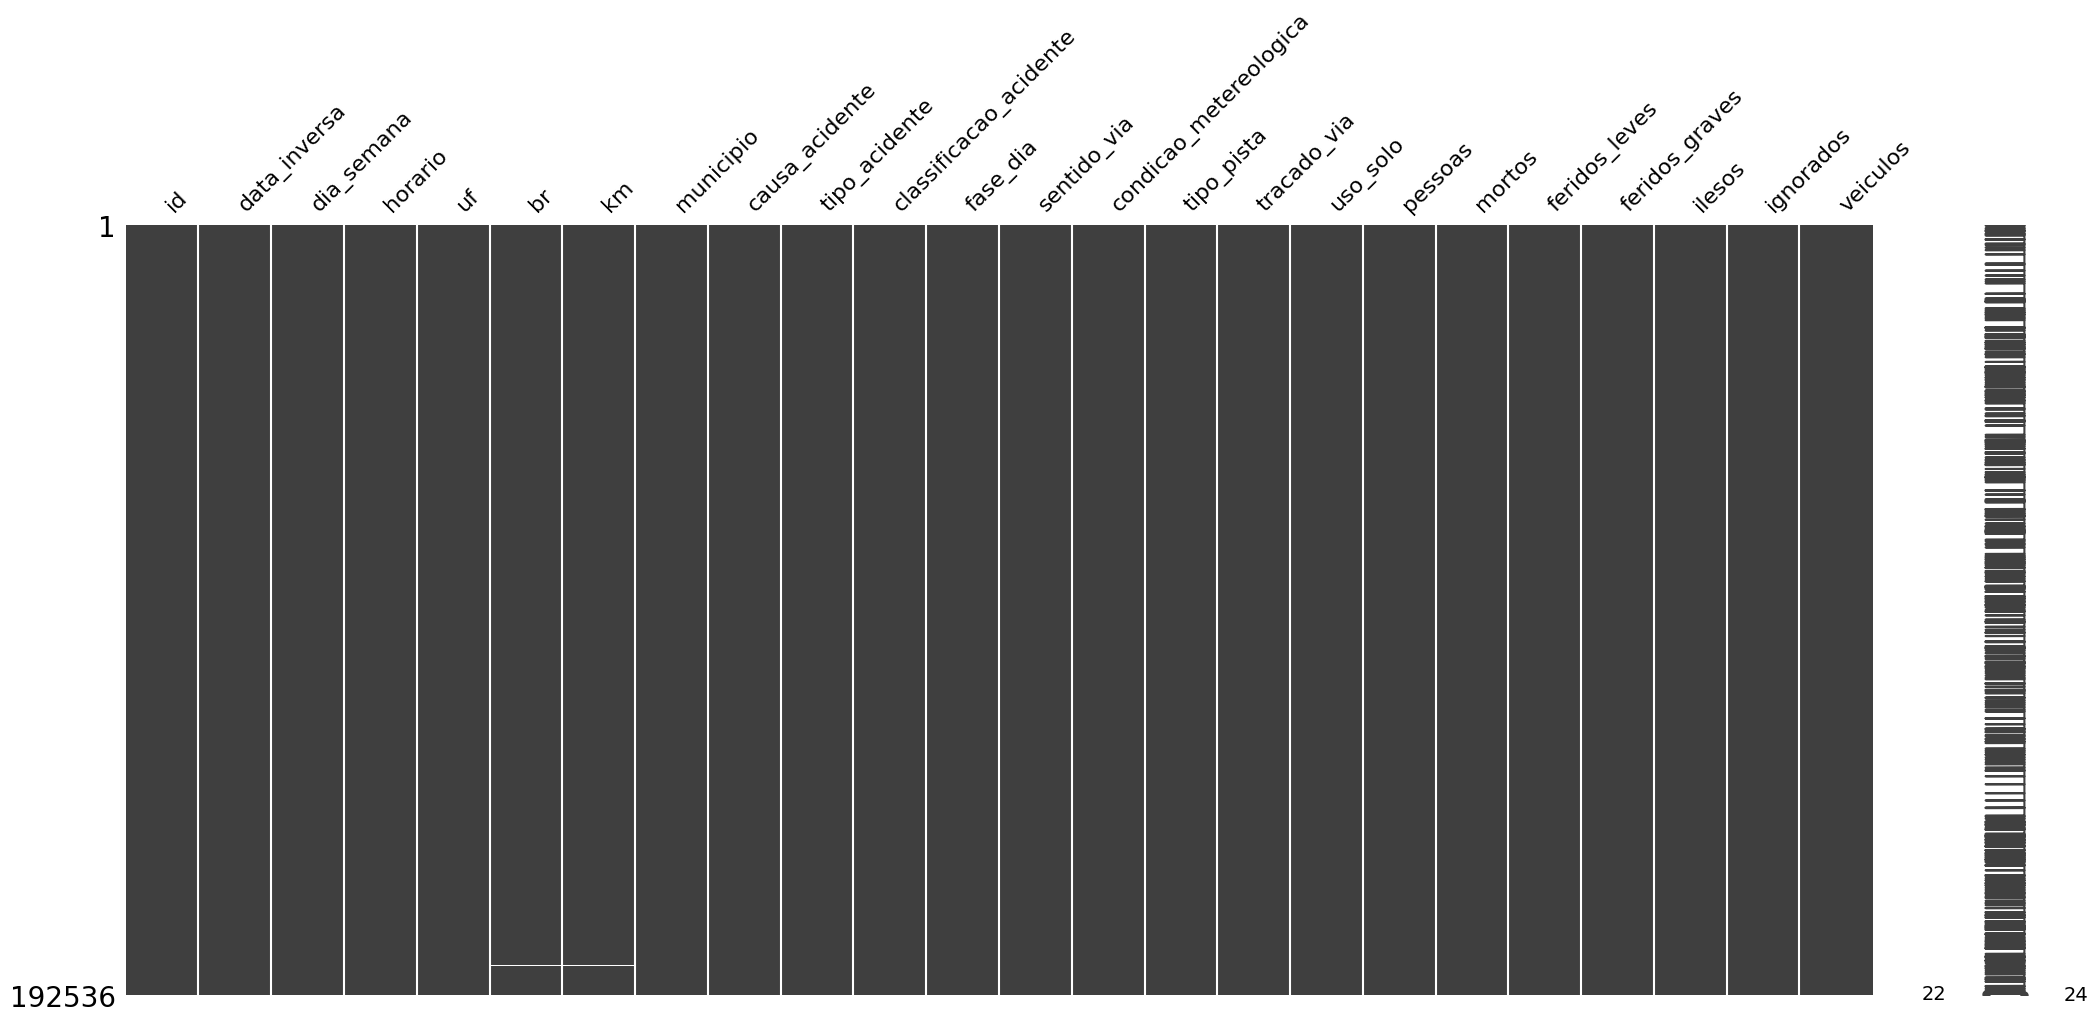

In [67]:
ms.matrix(acidentes)

Mas, mesmo assim, não iremos excluir esses registros, para os atributos KM e BR. Iremos substituir por zero.
>
E o atributo tipo_acidente iremos substituir por 'Não Informado'.

In [68]:
# substituindo os NaN de KM e BR por 0
acidentes['km'].fillna('0', inplace=True)
acidentes['br'].fillna(0, inplace=True)


In [69]:
# Agora que o atributo BR não tem missings, iremos converter de float para int
acidentes['br'] = acidentes['br'].astype(int)

Pronto, sem missings.

In [70]:
acidentes.isnull().sum()

id                        0
data_inversa              0
dia_semana                0
horario                   0
uf                        0
br                        0
km                        0
municipio                 0
causa_acidente            0
tipo_acidente             0
classificacao_acidente    0
fase_dia                  0
sentido_via               0
condicao_metereologica    0
tipo_pista                0
tracado_via               0
uso_solo                  0
pessoas                   0
mortos                    0
feridos_leves             0
feridos_graves            0
ilesos                    0
ignorados                 0
veiculos                  0
dtype: int64

><font color=#FE8202>KM

Vamos transformar esse atributo para float.
>
Para isso, precismos substituir a virgula por ponto, só assim poderemos converter para float.


In [71]:
#Substituindo virgula por ponto
acidentes.km =  acidentes.km.str.replace(',','.')

#Convertendo para float
acidentes.km =  acidentes.km.astype('float')

In [72]:
acidentes['km'].dtypes

dtype('float64')

---

###**<font color=#FE8202> 4.2 Criação de recursos**

Também conhecida como ***feature engineering***, a criação de recursos consiste em criar, a partir dos atributos originais, um conjunto de atributos que capture informações importantes.

####**<font color=#FE8202> 4.2.2 Construção de recursos**

><font color=#FE8202>Data e tempo

A partir do atributo data_inversa e horario, iremos construir atributos derivados dessa junção, que irá facilitar a visualização dos dados. São eles:
>
ano = ano do acidente
>
mes = mês do acidente
>
hora = extrai "Hora" do horario completo HH:MM:SS
>
ano_mes = ano e mês do acidente
>
semana = valor inteiro que representa o dia da semana

In [73]:
#criando o atributo data_hora, concatenando data_inversa com horario
acidentes['data_hora'] = acidentes['data_inversa'].map(str) + ' ' + acidentes['horario']

#convertendo para datetime
acidentes['data_hora'] = pd.to_datetime(acidentes['data_hora'])

#Extraindo ano, mes, hora, ano_mes e semana
acidentes['ano'] = acidentes['data_hora'].dt.year
acidentes['mes'] = acidentes['data_hora'].dt.month
acidentes['hora'] = acidentes['data_hora'].dt.hour
acidentes['ano_mes'] = acidentes['data_hora'].dt.strftime('%Y-%m')
acidentes['semana'] = acidentes['data_hora'].dt.weekday

In [74]:
#excluir as colunas que não iremos mais utilizar, evitando a redundância de informação
acidentes.drop([ 'horario','dia_semana','data_hora'],	axis=1, inplace = True)

Como cada registro é um acidente, vou criar uma variável para facilitar as analises.

In [75]:
#Cada linha é um registro de ocorrencia
#Criaremos o atributo "acidente", quantidade de acidentes
acidentes['acidente'] = 1

><font color=#FE8202>Atributo alvo (Target)

Como o nosso problema é de aprendizado de máquina supervisionado, pois a partir de resultados conhecidos, posso usar aquilo que já sei para prever cenários que ainda não sei, precisamos de uma variável alvo.
>
O dataframe de acidentes, já tem um atributo chamado classificação_acidente, com os seguintes valores: Sem vítmas, Com vítimas feridas e Com vítimas fatais.
>
Dessa forma podemos criar um atributo binário chamado “risco”, onde classifico os valores “Com vítimas feridas” e “Com vítimas fatais” com 1 e Sem vítimas com 0.


In [76]:
# Criando o atributo risco, aplicando a função lambda em classificacao_acidente
acidentes['risco'] = acidentes.classificacao_acidente.apply(
                    lambda x: 1 if x in ['Com Vítimas Feridas', 'Com Vítimas Fatais'] else 0
                    )

In [77]:
acidentes.drop('classificacao_acidente', axis = 1,  inplace = True)



---



###**<font color=#FE8202> 4.3 Redução da dimensionalidade**

Os datasets podem ter muitas características, e muitos algoritmos de Machine Learning funcionam melhor se a dimensionalidade for menor.
>
Iremos utilizar a técnica **SelectKBest** para escolher os melhores atributos.

Mas, antes de começar, vamos reduzir o dataset, utilizando a UF com mais acidentes em Rodovias Federais.
>
Assim, melhoramos o tempo da analise.



In [78]:
#criando dataframe para construir grafico
gr_ac_uf =  acidentes.groupby(["uf"])['acidente','ilesos','feridos_leves','feridos_graves','mortos'].sum().reset_index()
#Ordenando
gr_ac_uf = gr_ac_uf.sort_values('acidente', ascending=False)

In [79]:
fig0 = px.bar(gr_ac_uf, x="uf", y="acidente",
             #color='Score',
             template="plotly_dark",
             text_auto=True,
             height=500, #altura
             width=1000,  #largura
             color_discrete_sequence=["#FE8202"],
             hover_data=['ilesos','feridos_leves','feridos_graves','mortos'],
             labels=dict(uf=" UF", acidente = "Acidentes", pessoas='Pessoas', ilesos='Ilesos', feridos_leves='Feridos Leves', feridos_graves='Feridos Graves', mortos='Óbitos'),

             title = "Acidentes de trânsito por UF")
fig0.update_traces(textposition='outside')
fig0.update_yaxes(showticklabels=True)
fig0.update_xaxes(showgrid=False)
fig0.update_yaxes(showgrid=True)
fig0.update_layout(xaxis = dict(linecolor='rgba(0,0,0,1)', # adicionando linha em y = 0
                                tickmode = 'array', # alterando o modo dos ticks
                                tickvals = gr_ac_uf['uf'], # setando a posição do tick de x
                                ticktext = gr_ac_uf['uf']),# setando o valor do tick de x
                                title_x = 0.5) #centralizando o titulo
fig0.show()

A unidade federativa com mais acidentes é Minas Gerais.
>
Agora será criado um dataset apenas com esses registros.

In [80]:
acidentes_agr_uf_mg = acidentes[(acidentes['uf'] == 'MG')].copy()

####**<font color=#FE8202> 4.3.2 Feature Selection**

A seleção de características, ou feature selection, consiste em usar apenas um subconjunto das características originais, desconsiderando as características redundantes ou irrelevantes.
>
Existem diversos métodos, onde um algoritmo pode decidir quais atributos usar e quais ignorar, ou um especialista de negócios toma a decisão de quais atributos selecionar.
>
Nessa etapa vamos utilizar duas técnicas, para verificar a importancia de cada atributo, e assim,selecionar os melhores atributos, para que possa ser utilizado para construir um modelo de **Machine Learnig**.

####**<font color=#FE8202> 4.3.2.1 Preparação dos dados**

Nessa etapa vamos preparar os dados para que possam ser utilizados nas técnicas de seleção de atributos.

In [81]:
acidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192536 entries, 0 to 192535
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      192536 non-null  float64
 1   data_inversa            192536 non-null  object 
 2   uf                      192536 non-null  object 
 3   br                      192536 non-null  int64  
 4   km                      192536 non-null  float64
 5   municipio               192536 non-null  object 
 6   causa_acidente          192536 non-null  object 
 7   tipo_acidente           192536 non-null  object 
 8   fase_dia                192536 non-null  object 
 9   sentido_via             192536 non-null  object 
 10  condicao_metereologica  192536 non-null  object 
 11  tipo_pista              192536 non-null  object 
 12  tracado_via             192536 non-null  object 
 13  uso_solo                192536 non-null  object 
 14  pessoas             

In [82]:
# Preparação dos dados
array = acidentes_agr_uf_mg.values

# Separação em bases de treino e teste (holdout)
X = array[:,0:27] # atributos
y = array[:,27] # classe (target)


In [83]:
# ordinal encoding para os atributos X
encoded_X = OrdinalEncoder().fit_transform(X)

# exibindo os dados transformados
print("Atributos transformados:")
print(encoded_X[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[0.000e+00 0.000e+00 0.000e+00 1.500e+01 4.856e+03 1.590e+02 4.600e+01
  1.800e+01 3.000e+00 0.000e+00 0.000e+00 0.000e+00 3.000e+00 0.000e+00
  3.000e+00 0.000e+00 4.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 6.000e+00 0.000e+00 2.000e+00 0.000e+00]
 [1.000e+00 0.000e+00 0.000e+00 7.000e+00 5.935e+03 2.090e+02 3.600e+01
  1.000e+01 3.000e+00 1.000e+00 1.000e+00 0.000e+00 5.000e+00 1.000e+00
  3.000e+00 0.000e+00 1.000e+00 0.000e+00 3.000e+00 0.000e+00 1.000e+00
  0.000e+00 0.000e+00 6.000e+00 0.000e+00 2.000e+00 0.000e+00]
 [2.000e+00 0.000e+00 0.000e+00 1.500e+01 3.876e+03 1.730e+02 1.400e+01
  2.000e+00 0.000e+00 1.000e+00 1.000e+00 0.000e+00 5.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 5.000e+00 0.000e+00 2.000e+00 0.000e+00]
 [3.000e+00 0.000e+00 0.000e+00 1.500e+01 2.164e+03 1.390e+02 8.100e+01
  1.800e+01 0.000e+00 0.000e+00 1.000e+00 2.000e+00 5.000e+00 0.00

####**<font color=#FE8202> 4.3.2.2 SelectKBest**

Vamos analisar cada uma das features de forma separada, considerando sua relação com o target por meio de testes estatísticos e selecionar os K recursos de maior pontuação.


In [84]:
# SelectKBest

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=13)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(encoded_X, y)

# Reduz X para os atributos selecionados
features = fit.transform(encoded_X)

In [85]:
# Scores para cada atributo
names = []
values = []
alg = []

# laço para coletar o nome de cada atributo do dataframe e sua devida pontuação
for i in range(len(fit.scores_)):
    alg.append('SelectKBest') #algoritmo utilizado
    names.append(acidentes_agr_uf_mg.columns[i])
    values.append(fit.scores_[i])

fe_select_kbest = pd.DataFrame((zip(alg, names, values)), columns = ['algoritmo','atributo', 'pontuacao'])
fe_select_kbest = (fe_select_kbest.sort_values(by='pontuacao', ascending=False)).head(13)
fe_select_kbest

,algoritmo,atributo,pontuacao
16,SelectKBest,feridos_leves,3268.735625
17,SelectKBest,feridos_graves,941.826641
18,SelectKBest,ilesos,701.568386
14,SelectKBest,pessoas,330.174736
19,SelectKBest,ignorados,317.809138
15,SelectKBest,mortos,254.001563
20,SelectKBest,veiculos,138.278838
7,SelectKBest,tipo_acidente,80.467084
8,SelectKBest,fase_dia,68.360438
6,SelectKBest,causa_acidente,49.724790


####**<font color=#FE8202> 4.3.2.3 Criando o dataset com os melhores atributos**

Nessa etapa iremos criar um dataset somente com os campos selecionados pelo SelectKBest, para ser utilizado na modelagem e inferência.

**Campos selecionados:**
>
feridos_leves
>
feridos_graves
>
ilesos
>
pessoas
>
ignorados
>
mortos
>
veiculos
>
tipo_acidente
>
fase_dia
>
causa_acidente
>
tracado_via
>
uso_solo
>
tipo_pista
>
risco

In [86]:
ml_model_espec = acidentes[['feridos_leves','feridos_graves','ilesos',
                                'pessoas','ignorados','mortos','veiculos',
                                'tipo_acidente','fase_dia','causa_acidente',
                            'tracado_via','uso_solo','tipo_pista','risco']]

In [87]:
ml_model_espec.shape

(192536, 14)

###**<font color=#FE8202> 4.4 Transformações categóricas**

Uma etapa muito importante é o tratamento de variáveis categóricas, apesar de não ser uma regra, diversos modelos trabalham com dados numéricos e não são capazes de interpretar dados categóricos.
>
Essas categorias muitas vezes são muito importantes para explicar comportamentos.
>
Sendo assim é preciso representar categorias através de números.
>
Utilizaremos as funções, One-hot encoding, Dummy encoding e LabelEncoder da biblioteca SciKit Learning (Sklearn) para transformar dados categóricos em numéricos.


**Importante!**
>
Antes de começar as tranformações, é necessário separar o dataframe em previsores e alvo.

In [88]:
ml_model_espec.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192536 entries, 0 to 192535
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   feridos_leves   192536 non-null  int64 
 1   feridos_graves  192536 non-null  int64 
 2   ilesos          192536 non-null  int64 
 3   pessoas         192536 non-null  int64 
 4   ignorados       192536 non-null  int64 
 5   mortos          192536 non-null  int64 
 6   veiculos        192536 non-null  int64 
 7   tipo_acidente   192536 non-null  object
 8   fase_dia        192536 non-null  object
 9   causa_acidente  192536 non-null  object
 10  tracado_via     192536 non-null  object
 11  uso_solo        192536 non-null  object
 12  tipo_pista      192536 non-null  object
 13  risco           192536 non-null  int64 
dtypes: int64(8), object(6)
memory usage: 20.6+ MB


In [89]:
previsores = ml_model_espec.drop('risco', axis = 1) #previsores
alvo = ml_model_espec['risco'] #alvo

####**<font color=#FE8202> 4.4.1 One-hot Encoding**

In [90]:
# one hot encode para os previsores x
ml_model_onehot = OneHotEncoder(sparse=False).fit_transform(previsores)

In [91]:
#Verificando os dados transformados
print(ml_model_onehot[:5, :])

[[1. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 1.]]


In [92]:
ml_model_onehot.shape

(192536, 351)

####**<font color=#FE8202> 4.4.2 OrdinalEncoder**

In [127]:
# ordinal encoding para os atributos X
ml_model_ordinal = OrdinalEncoder().fit_transform(previsores)

# exibindo os dados transformados
print("Atributos transformados:")
print(ml_model_ordinal[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[ 0.  5.  0.  4.  0.  0.  0.  0.  2.  8.  5.  0.  2.]
 [ 0.  0.  1.  1.  0.  1.  0.  1.  2. 36.  5.  1.  0.]
 [ 1.  0.  1.  1.  0.  0.  1.  7.  2. 47.  5.  1.  2.]
 [ 0.  1.  0.  0.  0.  0.  0. 18.  2. 84.  5.  1.  2.]
 [ 2.  4.  0.  5.  0.  0.  0.  2.  2. 47.  0.  0.  2.]]


In [96]:
ml_model_ordinal.shape

(192536, 13)

###**<font color=#FE8202> 4.5 Separação em conjunto de Treino e Teste**

Utilizaremos a função train_test_split() do scikit-learn, que irá separar os atributos **previsores** e **alvo**, em quatro partes na proporção de 80/20, ou seja, 80% para dados de treino e 20% para dados de teste.
>
Importante o conjunto de treino ser grande o suficiente para que o modelo seja capaz de aprender os padrões a partir dos dados disponibilizados, enquanto o conjunto de teste, deve ser utilizado apenas uma vez, quando o modelo estiver finalizado, logo, não tem a necessidade de ser muito grande.
>
Michael Galarnyk, ilustra bem no seu artigo, através da imagem abaixo, o procedimento de divisão de teste(test) e treino(train).
(https://builtin.com/data-science/train-test-split)

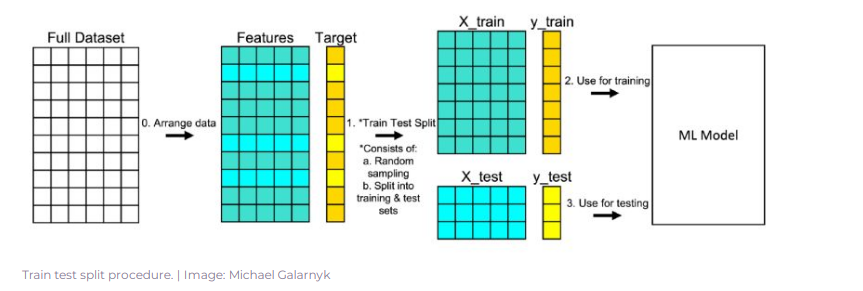

Na etapa de pré-processamento, realizamos a transformação categórica com três técnicas, e agora iremos dividi-los em conjunto de treino e teste, e depois testar qual deles teve o melhor desempenho em um modelo de Machine Learning.

---

In [97]:
#Setup
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Parâmetros e partições da validação cruzada
scoring = 'f1' #Pontuação f1-score
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

>**<font color=#FE8202> One-hot Encoder**

In [98]:
#previsor ml_model_onehot e alvo y (Transformados na etapa 4.4.1)
x_treino_oneh, x_teste_oneh, y_treino_oneh, y_teste_oneh = train_test_split(ml_model_onehot, alvo, test_size = test_size, random_state = seed)

---

>**<font color=#FE8202> Dummy Variable Encoding**

In [99]:
#previsor ml_model_onehot e alvo y (Transformados na etapa 4.4.2)
x_treino_dummy, x_teste_dummy, y_treino_dummy, y_teste_dummy = train_test_split(ml_model_dummy, alvo, test_size = test_size, random_state = seed)



---



>**<font color=#FE8202> OrdinalEncoder**

In [100]:
x_treino_oe, x_teste_oe, y_treino_oe, y_teste_oe = train_test_split(ml_model_ordinal, alvo, test_size = test_size, random_state = seed)



---



#**<font color=#FE8202> 5. Modelo de Machine Learning**

###**<font color=#FE8202> 5.1 Criação e avaliação de modelos: linha base**

Para essa avaliação vamos utilizar o **método ensemble**, que combina vários modelos de machine learning, o que pode fazer com que os resultados sejam melhores do que quando usamos apenas um modelo.
>
Vamos utilzar o esembles do tipo voting, que utiliza uma das técnicas mais simples de combinar predições de vários modelos. No nosso caso utilizaremos: Regressão logística, árvore de decisão e SVC.



---



Em seguida, para a base de treino, vamos avaliar a acurácia dos modelos, em suas diferentes transformações categóricas, e treina-los com os algoritimos de: **Regressão Logística, KNN, árvore de classificação, NB e SVM**, utilizando sua configuração padrão, sem variar seus hiperparâmetros.
>
Para uma melhor avaliação, utilizaremos o método de validação cruzada (10 folds) e compararemos os resultados graficamente por meio de boxplots.

><font color=#FE8202>Com OrdinalEnconder

LR: 1.000000 (0.000000) Tempo de treinamento: 27.23s
KNN: 0.982549 (0.000819) Tempo de treinamento: 27.89s
CART: 1.000000 (0.000000) Tempo de treinamento: 0.88s
NB: 0.999921 (0.000061) Tempo de treinamento: 0.65s
XGBoost: 1.000000 (0.000000) Tempo de treinamento: 51.89s
Bagging: 1.000000 (0.000000) Tempo de treinamento: 61.98s
RF: 1.000000 (0.000000) Tempo de treinamento: 46.96s
Ada: 1.000000 (0.000000) Tempo de treinamento: 80.48s
GB: 1.000000 (0.000000) Tempo de treinamento: 89.81s
Voting: 1.000000 (0.000000) Tempo de treinamento: 30.35s


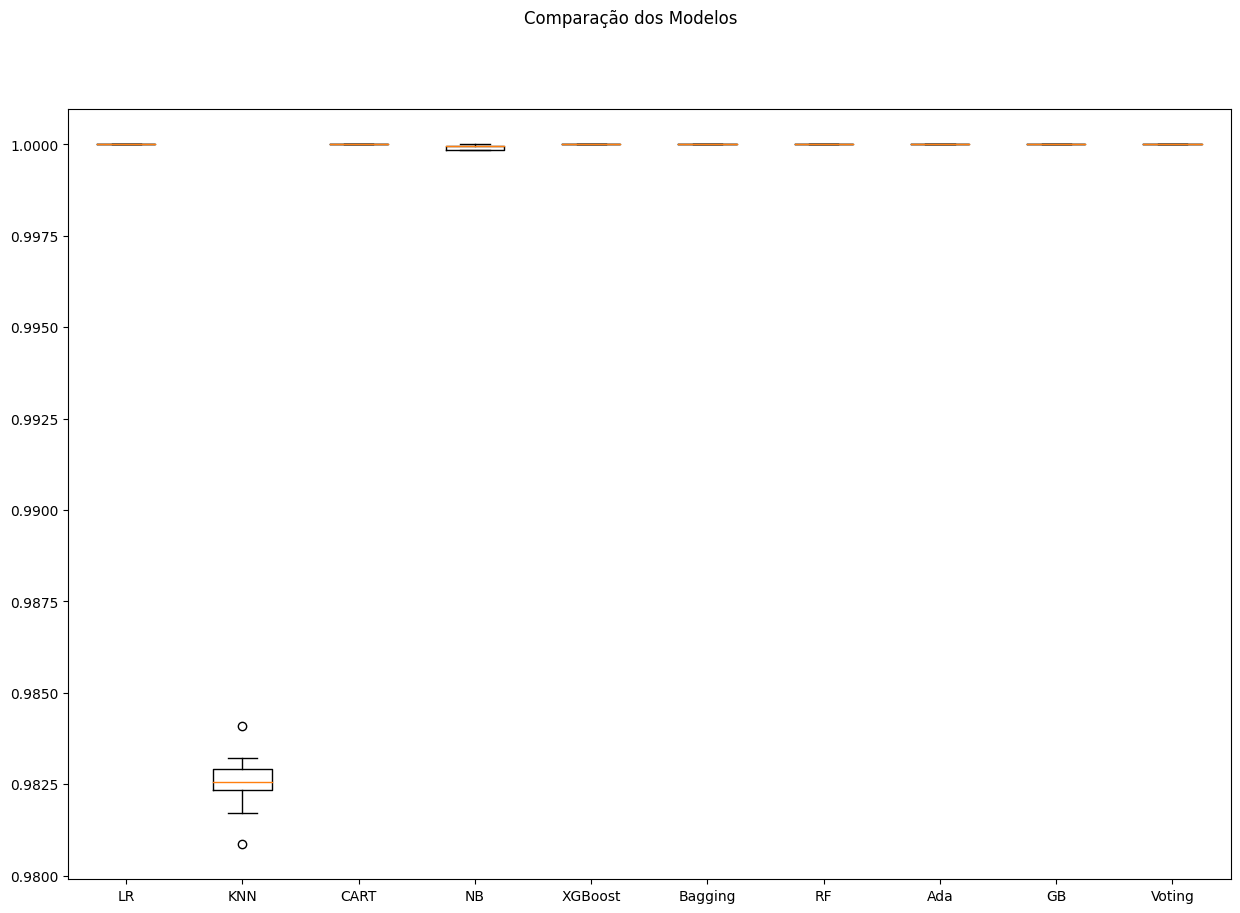

In [101]:
# Tempo de execução 11 minutos

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGBoost', XGBClassifier()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))


# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    inicio = time.time()
    cv_results = cross_val_score(model, x_treino_oe, y_treino_oe, cv=kfold, scoring=scoring)
    fim = time.time()
    tempo = fim-inicio #tempo de execução do modelo
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg, f"Tempo de treinamento: {tempo:.2f}s") #em segundos

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

><font color=#FE8202>Com One-hot Encoding

LR: 1.000000 (0.000000) Tempo de treinamento: 59.10s
KNN: 0.998687 (0.000179) Tempo de treinamento: 581.99s
CART: 1.000000 (0.000000) Tempo de treinamento: 12.43s
NB: 0.999679 (0.000089) Tempo de treinamento: 9.73s
XGBoost: 1.000000 (0.000000) Tempo de treinamento: 919.61s
Bagging: 1.000000 (0.000000) Tempo de treinamento: 762.37s
RF: 0.999683 (0.000121) Tempo de treinamento: 172.59s
Ada: 1.000000 (0.000000) Tempo de treinamento: 936.08s
GB: 1.000000 (0.000000) Tempo de treinamento: 1142.16s
Voting: 1.000000 (0.000000) Tempo de treinamento: 75.58s


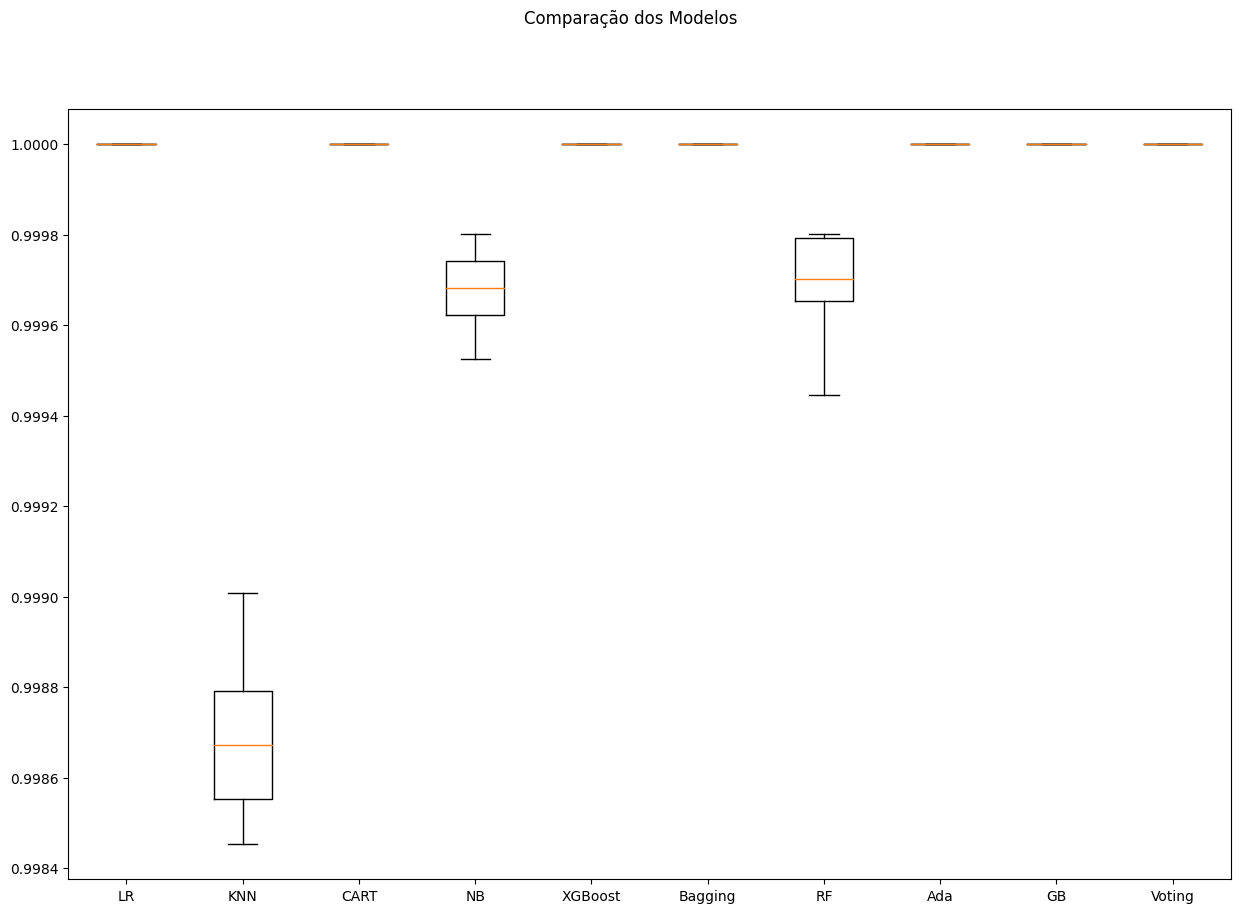

In [102]:
#Tempo de execução 2hr
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('XGBoost', XGBClassifier()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    inicio = time.time()
    cv_results = cross_val_score(model, x_treino_oneh, y_treino_oneh, cv=kfold, scoring=scoring)
    fim = time.time()
    tempo = fim-inicio #tempo de execução do modelo
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg, f"Tempo de treinamento: {tempo:.2f}s") #em segundos

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Podemos verificar que o modelo utilizando as transformações categóricas com Ordinal Encoder, são mais rápidas quando comparadas com as demais.
>
Sendo assim, seguiremos as analises utilizando Ordinal Encoder.

###**<font color=#FE8202> 5.2 Criação e avaliação de modelos: dados padronizados e normalizados**

Nessa etapa vamos utilizar a biblioteca Pipeline para criar e avaliar os modelos através da validação cruzada com os dados padronizados e normalizados (evitando o data leakage) e comparar o seu resultado com os modelos treinados com o dataset original

LR-orig: 1.000000 (0.000000) Tempo de treinamento: 27.28s
KNN-orig: 0.982549 (0.000819) Tempo de treinamento: 24.95s
CART-orig: 1.000000 (0.000000) Tempo de treinamento: 1.06s
NB-orig: 0.999921 (0.000061) Tempo de treinamento: 0.94s
Bag-orig: 1.000000 (0.000000) Tempo de treinamento: 57.67s
RF-orig: 1.000000 (0.000000) Tempo de treinamento: 44.33s
Ada-orig: 1.000000 (0.000000) Tempo de treinamento: 76.76s
Vot-orig: 1.000000 (0.000000) Tempo de treinamento: 29.96s
LR-padr: 1.000000 (0.000000) Tempo de treinamento: 5.32s
KNN-padr: 0.997865 (0.000267) Tempo de treinamento: 93.78s
CART-padr: 1.000000 (0.000000) Tempo de treinamento: 1.24s
NB-padr: 0.999937 (0.000051) Tempo de treinamento: 1.00s
Bag-padr: 1.000000 (0.000000) Tempo de treinamento: 58.16s
RF-padr: 1.000000 (0.000000) Tempo de treinamento: 45.44s
Ada-padr: 1.000000 (0.000000) Tempo de treinamento: 76.00s
Vot-padr: 1.000000 (0.000000) Tempo de treinamento: 7.25s
LR-norm: 0.999794 (0.000100) Tempo de treinamento: 17.68s
KNN-norm

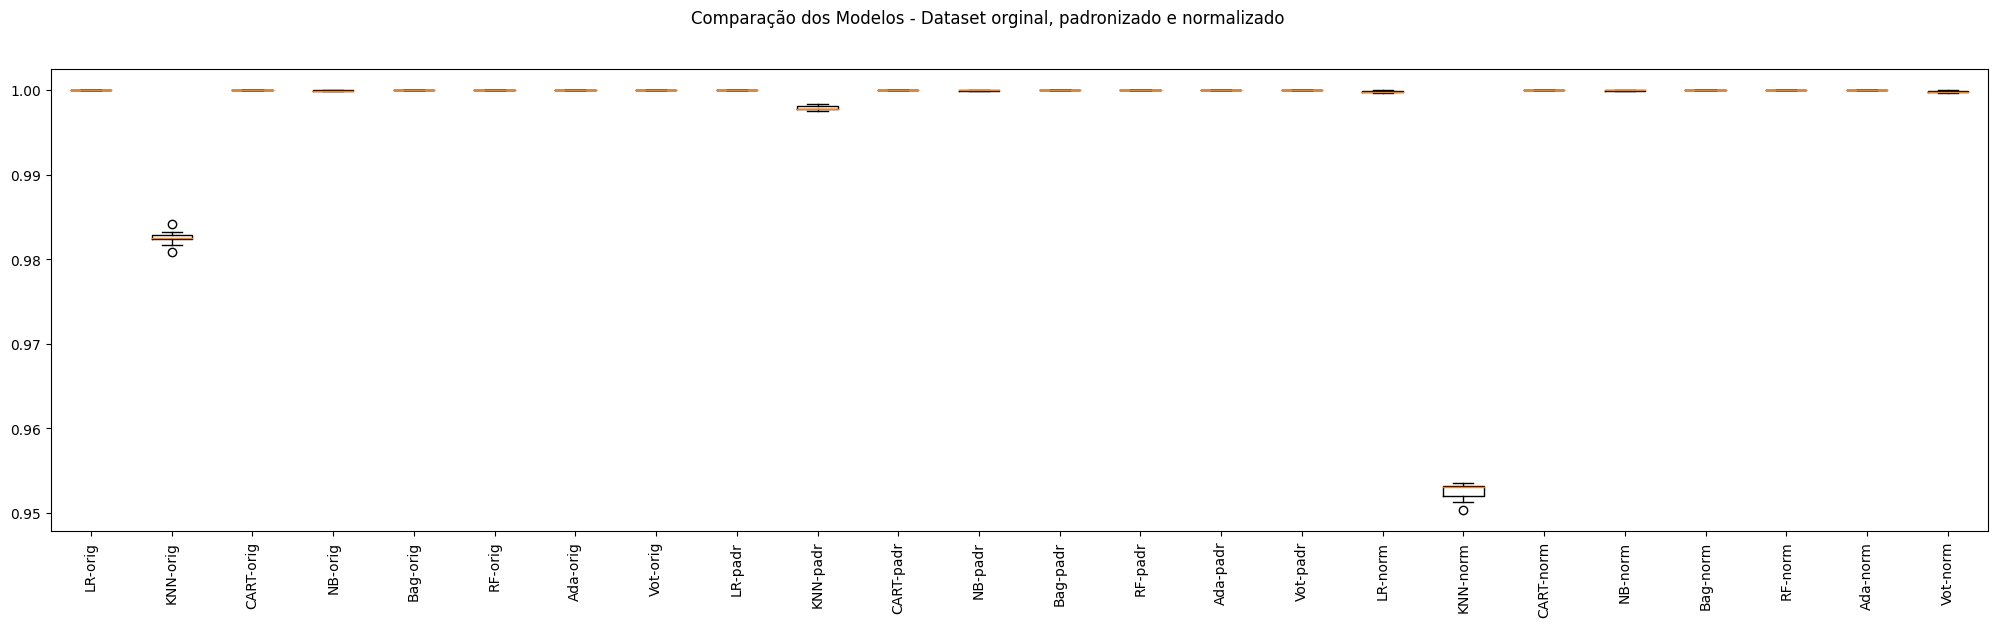

In [105]:
#Tempo de execução 5hr 55 minutos
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())

bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))

adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))

voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))

pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))

pipelines.append(('Ada-orig', Pipeline([adaboost])))

pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))

pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))

pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))

pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))

pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))

pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))

pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    inicio = time.time()
    cv_results = cross_val_score(model, x_treino_oe, y_treino_oe, cv=kfold, scoring=scoring)
    fim = time.time()
    tempo = fim-inicio #tempo de execução do modelo
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
    print(msg, f"Tempo de treinamento: {tempo:.2f}s")   #em segundos



# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

###**<font color=#FE8202> 5.3 Otimização dos hiperparâmetros**

Agora iremos utilizar a biblioteca Grid Search para executar a otimização dos hiperparâmetros dos algoritmos **Árvore de decisão**, **Regressão Logística** e **KNN**, a título de exemplificação, a fim de buscar resultados ainda melhores.

####**<font color=#FE8202> 5.3.1 Árvore de decisão**

Árvore de decisão é um método de aprendizado de máquina supervisionado que é utilizado para classificação e para regressão.
>
Seleciona a ordem que os atributos irão aparecer na árvore, sempre de cima para baixo, conforme sua importância para a predição, assim como determina a separação dos ramos da árvore.
>
Estrutura similar a um fluxograma. É composto por nós, ramos e folhas.


In [106]:
#26 min
arvore = DecisionTreeClassifier()

#Definindo os parâmetros
param_grid = {"criterion": ["gini", "entropy"], #criterio
              "min_samples_split": range(1,11), # o mínimo de registros necessários para que uma separação seja feita
              "max_depth": 	   range(1,11), #Profundidade máxima da árvore
              "min_samples_leaf": range(1,6), # o mínimo de registros necessários em cada nós-folha
              "max_leaf_nodes": [1, 2, 5, 10, 15, 20] # a quantidade máxima de nós-folha que a árvore pode ter
}

#Executando o GridSearchCV
grid = GridSearchCV(arvore, param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(x_treino_oe, y_treino_oe)


In [107]:
#Avaliando os resultados
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

1.0
{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)


Agora que já temos os melhores parâmetros, vamos aplica-los.

In [108]:
# Preparação do modelo
inicio = time.time()
arvore = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)
arvore.fit(x_treino_oe, y_treino_oe)
fim = time.time()
log_arvore = fim-inicio

In [109]:
# Estimativa da acurácia no conjunto de teste
previsoes_arvore = arvore.predict(x_teste_oe)

# Avaliação

#Acurácia
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_oe, previsoes_arvore) * 100.0))
# Precisão
print("Precisão: %.2f%%" % (precision_score(y_teste_oe, previsoes_arvore) * 100.0))
# Recall / Revocação
print("Revocação: %.2f%%" % (recall_score(y_teste_oe, previsoes_arvore) * 100.0))
# F1 score
print("F1-Score: %.2f%%" % (f1_score(y_teste_oe, previsoes_arvore) * 100.0))
print(f"Tempo de treinamento: {log_arvore:.2f}s")

Acurácia: 100.00%
Precisão: 100.00%
Revocação: 100.00%
F1-Score: 100.00%
Tempo de treinamento: 0.09s


> <font color=#FE8202>Matriz de confusão

Após estimar a classe nos dados de teste, comparamos a classe estimada pelo modelo com a classe real.
>
Como o classificador tem apenas 2 opções de classificação, a matriz de confusão tem dimensões 2 por 2, onde as posições representam:
>
(0,0). Verdadeiro positvo (TP)
>
(0,1): Falsos negativos (FN)
>
(1,0): Falsos positivos (FP)
>
(1,1) Verdadeiros negativos (TN)


Text(50.722222222222214, 0.5, 'previsoes_arvore')

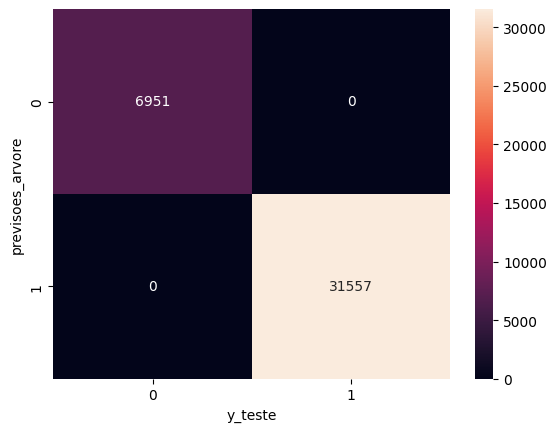

In [110]:
sns.heatmap(confusion_matrix(y_teste_oe, previsoes_arvore), annot= True, fmt='g')
plt.xlabel('y_teste')
plt.ylabel('previsoes_arvore')

In [111]:
print('Total de Amostras: {:,d}'.format(y_teste_oe.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_oe == previsoes_arvore).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_oe != previsoes_arvore).sum()).replace(',','.'))

Total de Amostras: 38.508
Acertos de classificação: 38.508
Erros de classificação: 0


####**<font color=#FE8202> 5.3.2 Regressão Logística**

Algoritmo de classificação em aprendizagem supervisionada.
Utiliza conceitos de regressão linear em seu modelo matemático.
>
Pode ser binária (variável dependente binária) ou multinomial
(variável dependente com mais de duas categorias).

In [112]:
#2 min
log_re = LogisticRegression(max_iter=200)

#Definindo os parâmetros
param_grid = {'C': np.logspace(-5, 8, 15), 'penalty': ['l1', 'l2']}

#Executando o GridSearchCV
grid = GridSearchCV(log_re, param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(x_treino_oe, y_treino_oe)

In [113]:
#Avaliando os resultados
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

1.0
{'C': 0.4393970560760795, 'penalty': 'l2'}
LogisticRegression(C=0.4393970560760795, max_iter=200)


Agora que já temos os melhores parâmetros, vamos aplica-los.

In [114]:
# Preparação do modelo
inicio = time.time()
log_re = LogisticRegression(C=0.4393970560760795, max_iter=200)
log_re.fit(x_treino_oe, y_treino_oe)
fim = time.time()
log_log_re = fim-inicio

In [115]:
# Estimativa da acurácia no conjunto de teste
previsoes_log_re = log_re.predict(x_teste_oe)

# Avaliação

#Acurácia
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_oe, previsoes_log_re) * 100.0))
# Precisão
print("Precisão: %.2f%%" % (precision_score(y_teste_oe, previsoes_log_re) * 100.0))
# Recall / Revocação
print("Revocação: %.2f%%" % (recall_score(y_teste_oe, previsoes_log_re) * 100.0))
# F1 score
print("F1-Score: %.2f%%" % (f1_score(y_teste_oe, previsoes_log_re) * 100.0))
print(f"Tempo de treinamento: {log_log_re:.2f}s")

Acurácia: 100.00%
Precisão: 100.00%
Revocação: 100.00%
F1-Score: 100.00%
Tempo de treinamento: 2.80s


> <font color=#FE8202>Matriz de confusão

Text(50.722222222222214, 0.5, 'previsoes_regressão_logistica')

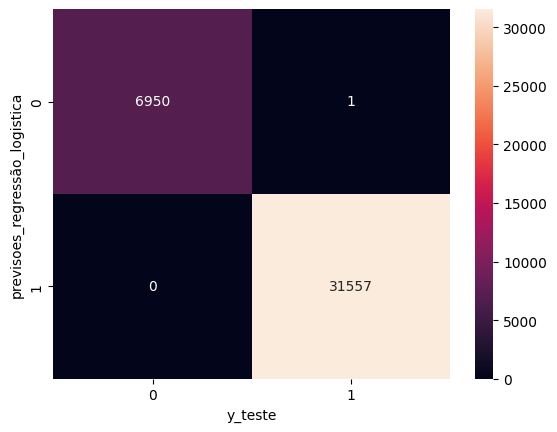

In [116]:
sns.heatmap(confusion_matrix(y_teste_oe, previsoes_log_re), annot= True, fmt='g')
plt.xlabel('y_teste')
plt.ylabel('previsoes_regressão_logistica')

In [ ]:
print('Total de Amostras: {:,d}'.format(y_teste_oe.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_oe == previsoes_log_re).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_oe != previsoes_log_re).sum()).replace(',','.'))

####**<font color=#FE8202> 5.3.3 Aprendizagem baseada em instâncias (KNN)**

KNN é a sigla de K Nearest Neighbors (vizinhos mais próximos), realizando a classificação das instâncias (dados) em classes (grupo de dados semelhantes).
>
É um algoritmo de classificação em aprendizagem supervisionada, e não possuiu um modelo matemático, apenas classifica uma instância através de cálculos de distâncias.


In [117]:
#13 min
knn = KNeighborsClassifier()

#Definindo os parâmetros
knn_range = list(range(1, 31))
param_grid = dict(n_neighbors=knn_range)


#Executando o GridSearchCV
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid_result = grid.fit(x_treino_oe, y_treino_oe)

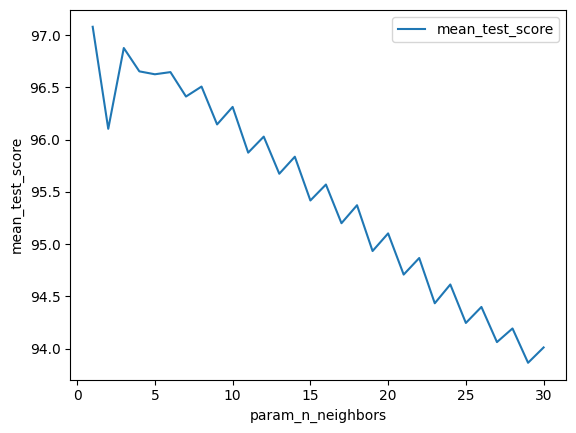

In [118]:
# Plotando um grafico com os resultados de cada parâmetro
result = pd.DataFrame(grid.cv_results_)[['param_n_neighbors','mean_test_score']]
result['mean_test_score'] = result['mean_test_score']*100
result.plot(kind='line',x='param_n_neighbors',y='mean_test_score')
plt.xlabel('param_n_neighbors')
plt.ylabel('mean_test_score')
plt.show()

Podemos reparar que o melhor resultado é com n_neighbors = 1.
>
Depois do parâmetro 3, o score diminui constantimente.

In [119]:
#Avaliando os resultados
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.9707975157303271
{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)


Agora que já temos os melhores parâmetros, vamos aplica-los.

In [120]:
# Preparação do modelo
inicio = time.time()
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_treino_oe, y_treino_oe)
fim = time.time()
log_knn = fim-inicio

In [121]:
# Estimativa da acurácia no conjunto de teste
previsoes_knn = knn.predict(x_teste_oe)

# Avaliação

#Acurácia
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_oe, previsoes_knn) * 100.0))
# Precisão
print("Precisão: %.2f%%" % (precision_score(y_teste_oe, previsoes_knn) * 100.0))
# Recall / Revocação
print("Revocação: %.2f%%" % (recall_score(y_teste_oe, previsoes_knn) * 100.0))
# F1 score
print("F1-Score: %.2f%%" % (f1_score(y_teste_oe, previsoes_knn) * 100.0))
print(f"Tempo de treinamento: {log_knn:.2f}s")

Acurácia: 97.48%
Precisão: 98.40%
Revocação: 98.53%
F1-Score: 98.47%
Tempo de treinamento: 0.43s


> <font color=#FE8202>Matriz de confusão

Text(50.722222222222214, 0.5, 'previsoes_knn')

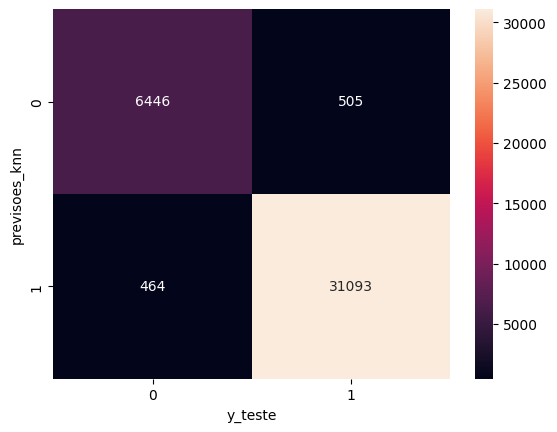

In [122]:
sns.heatmap(confusion_matrix(y_teste_oe, previsoes_knn), annot= True, fmt='g')
plt.xlabel('y_teste')
plt.ylabel('previsoes_knn')

In [123]:
print('Total de Amostras: {:,d}'.format(y_teste_oe.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_oe == previsoes_knn).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_oe != previsoes_knn).sum()).replace(',','.'))

Total de Amostras: 38.508
Acertos de classificação: 37.539
Erros de classificação: 969




---



###**<font color=#FE8202> 5.4 Melhor Modelo**

Vamos compara as avaliações dos três modelos anteriores.

In [124]:
print('Árvore de decisão')
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_oe, previsoes_arvore) * 100.0))
print("Precisão: %.2f%%" % (precision_score(y_teste_oe, previsoes_arvore) * 100.0))
print("Revocação: %.2f%%" % (recall_score(y_teste_oe, previsoes_arvore) * 100.0))
print("F1-Score: %.2f%%" % (f1_score(y_teste_oe, previsoes_arvore) * 100.0))
print(f"Tempo de treinamento: {log_arvore:.2f}s")
print('Total de Amostras: {:,d}'.format(y_teste_oe.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_oe == previsoes_arvore).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_oe != previsoes_arvore).sum()).replace(',','.'))
print('--------------------------------------------------------------------------------------')
print('Regressão Logística')
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_oe, previsoes_log_re) * 100.0))
print("Precisão: %.2f%%" % (precision_score(y_teste_oe, previsoes_log_re) * 100.0))
print("Revocação: %.2f%%" % (recall_score(y_teste_oe, previsoes_log_re) * 100.0))
print("F1-Score: %.2f%%" % (f1_score(y_teste_oe, previsoes_log_re) * 100.0))
print(f"Tempo de treinamento: {log_log_re:.2f}s")
print('Total de Amostras: {:,d}'.format(y_teste_oe.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_oe == previsoes_log_re).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_oe != previsoes_log_re).sum()).replace(',','.'))
print('--------------------------------------------------------------------------------------')
print('KNN')
print("Acurácia: %.2f%%" % (accuracy_score(y_teste_oe, previsoes_knn) * 100.0))
print("Precisão: %.2f%%" % (precision_score(y_teste_oe, previsoes_knn) * 100.0))
print("Revocação: %.2f%%" % (recall_score(y_teste_oe, previsoes_knn) * 100.0))
print("F1-Score: %.2f%%" % (f1_score(y_teste_oe, previsoes_knn) * 100.0))
print(f"Tempo de treinamento: {log_log_re:.2f}s")
print('Total de Amostras: {:,d}'.format(y_teste_oe.shape[0]).replace(',','.'))
print('Acertos de classificação: {:,d}'.format((y_teste_oe == previsoes_knn).sum()).replace(',','.'))
print('Erros de classificação: {:,d}'.format((y_teste_oe != previsoes_knn).sum()).replace(',','.'))

Árvore de decisão
Acurácia: 100.00%
Precisão: 100.00%
Revocação: 100.00%
F1-Score: 100.00%
Tempo de treinamento: 0.09s
Total de Amostras: 38.508
Acertos de classificação: 38.508
Erros de classificação: 0
--------------------------------------------------------------------------------------
Regressão Logística
Acurácia: 100.00%
Precisão: 100.00%
Revocação: 100.00%
F1-Score: 100.00%
Tempo de treinamento: 2.80s
Total de Amostras: 38.508
Acertos de classificação: 38.507
Erros de classificação: 1
--------------------------------------------------------------------------------------
KNN
Acurácia: 97.48%
Precisão: 98.40%
Revocação: 98.53%
F1-Score: 98.47%
Tempo de treinamento: 2.80s
Total de Amostras: 38.508
Acertos de classificação: 37.539
Erros de classificação: 969


Com os três algorítmos configurados com os melhores parâmetros, o que mais se destacou foi a **Árvore de decisão**, acertando todas as classificações, e com o menor tempo de execução.
>
No próximo passo vamos uitiza-lo para verificar dados não testados.

###**<font color=#FE8202> 5.5 Simulando a aplicação do modelo em dados não vistos**

Iremos simular a aplicação do modelo em dados não vistos, simulando um arquivo enviado pelo usuário com novas instâncias, mas que não sabemos a classe de saída.
>
Poderemos, então,aplicar nosso modelo recém-treinado para fazer a predição das classes.
>
Será necessário carregar esse arquivo com as mesmas transformações de dados utilizadas no treinamento do modelo.


In [125]:
# importando dados de uma url para um dataframe

# URL de importação
url3  = "https://raw.githubusercontent.com/gabrielmprata/MVP_02_ML/main/Novos_Acidentes.csv"

# Carga do dataset para o Pandas dataframe
acidentes_novos = pd.read_csv(url3, encoding="Latin 1", sep=';')


In [126]:
#Verificando a carga
acidentes_novos.head(3)

,feridos_leves,feridos_graves,ilesos,pessoas,ignorados,mortos,veiculos,tipo_acidente,fase_dia,causa_acidente,tracado_via,uso_solo,tipo_pista
0,1,0,0,1,0,0,1,Saída de leito carroçável,Plena Noite,Ausência de reação do condutor,Reta,Não,Simples
1,0,0,0,5,4,1,1,Atropelamento de Pedestre,Plena Noite,Entrada inopinada do pedestre,Reta,Sim,Dupla
2,0,1,0,1,0,0,1,Tombamento,Plena Noite,Reação tardia ou ineficiente do condutor,Não Informado,Não,Simples


> <font color=#FE8202>Aplicando OrdinalEncoder

In [128]:
#Criando o dataset para aplicar o OE
ml_model_new = acidentes_novos.copy()

# ordinal encoding para os atributos X
ml_model_oe_novos = OrdinalEncoder().fit_transform(ml_model_new)

# exibindo os dados transformados
print("Atributos transformados:")
print(ml_model_oe_novos[:5, :]) # 5 primeiras linhas, todas as colunas

Atributos transformados:
[[ 1.  0.  0.  0.  0.  0.  0. 11.  2.  4.  4.  0.  2.]
 [ 0.  0.  0.  4.  3.  1.  0.  0.  2. 14.  4.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0. 12.  2. 21.  3.  0.  2.]
 [ 0.  0.  1.  0.  0.  0.  0. 12.  3. 25.  0.  0.  0.]
 [ 0.  2.  1.  2.  0.  0.  1.  2.  3.  1.  3.  0.  2.]]


In [133]:
novos = arvore.predict(ml_model_oe_novos)

In [134]:
print(novos)

[1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0]
